In [1]:
import pandas as pd

# Read the file
file_path = 'Datasets/2_Delft.txt'

# Read the general parameters line
with open(file_path, 'r') as file:
    general_params = file.readline().strip()

# Read the rest of the file into a DataFrame
df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

# Displaying the DataFrame
print("General Parameters:", general_params)
print("Delivery Data:")
df

General Parameters: 800 1000 100 300 25 25000
Delivery Data:


,Start_Horizontal,Start_Vertical,Finish_Horizontal,Finish_Vertical,Earliest_Start,Latest_Finish
0,395,43,296,955,244,3620
1,734,467,300,833,21919,23595
2,473,815,21,810,24428,24959
3,210,150,387,12,12646,13491
4,314,563,141,419,2744,3381
...,...,...,...,...,...,...
295,561,555,125,269,11932,13489
296,3,203,346,877,721,3756
297,606,724,154,616,20196,21068
298,463,972,343,532,13263,14196


In [2]:
import pandas as pd

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def calculate_distance(point1, point2):
    """Calculate the Manhattan distance between two points."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def nearest_neighbor_route(df, sleds, T):
    routes = [[] for _ in range(sleds)]
    unvisited = df.index.tolist()

    for i in range(sleds):
        if unvisited:
            current_point = (df.loc[unvisited[0], 'Start_Horizontal'], df.loc[unvisited[0], 'Start_Vertical'])
            routes[i].append(current_point)
            unvisited.remove(unvisited[0])

            while unvisited:
                nearest_point, nearest_idx = None, None
                min_distance = float('inf')

                for idx in unvisited:
                    next_point = (df.loc[idx, 'Start_Horizontal'], df.loc[idx, 'Start_Vertical'])
                    distance = calculate_distance(current_point, next_point)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_point = next_point
                        nearest_idx = idx

                if nearest_point and calculate_distance(current_point, nearest_point) + len(routes[i]) <= T:
                    current_point = nearest_point
                    routes[i].append(current_point)
                    unvisited.remove(nearest_idx)
                else:
                    break

    return routes

# Example usage
file_path = 'Datasets/2_Delft.txt'
general_params, df = read_data(file_path)
H, V, S, P, B, T = general_params
routes = nearest_neighbor_route(df, S, T)
for i, route in enumerate(routes):
    print(f"Route for Sled {i+1}: {route}")


Route for Sled 1: [(395, 43), (385, 37), (357, 20), (348, 7), (310, 10), (311, 1), (311, 37), (296, 47), (277, 50), (266, 66), (275, 87), (243, 102), (229, 110), (210, 150), (234, 186), (219, 215), (216, 217), (258, 224), (291, 207), (324, 207), (319, 195), (310, 163), (332, 100), (400, 136), (427, 128), (468, 106), (481, 80), (480, 43), (426, 66), (423, 12), (528, 3), (544, 27), (582, 50), (583, 59), (601, 45), (625, 46), (621, 39), (597, 94), (557, 123), (559, 126), (540, 111), (511, 139), (502, 138), (498, 128), (495, 147), (471, 167), (468, 170), (506, 215), (517, 208), (528, 267), (552, 276), (558, 292), (558, 342), (557, 342), (524, 323), (497, 303), (495, 283), (482, 285), (449, 270), (432, 268), (400, 309), (378, 301), (362, 356), (345, 370), (379, 411), (426, 438), (432, 467), (474, 470), (481, 487), (500, 484), (525, 464), (517, 426), (530, 416), (534, 379), (584, 384), (637, 404), (623, 425), (631, 440), (635, 475), (648, 494), (613, 505), (593, 508), (582, 461), (587, 566),

In [4]:
df.sort_values(by=['Start_Horizontal','Start_Vertical'])


,Start_Horizontal,Start_Vertical,Finish_Horizontal,Finish_Vertical,Earliest_Start,Latest_Finish
296,3,203,346,877,721,3756
248,6,455,131,145,17131,18161
281,20,131,10,783,9134,10135
58,23,441,207,732,4790,5727
14,31,325,197,802,11368,12202
...,...,...,...,...,...,...
162,784,431,379,158,3227,5074
257,787,556,533,18,23346,24893
137,789,421,463,561,5017,6337
11,790,935,686,121,12617,14630


In [1]:
%pip install networkx
%pip install tk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


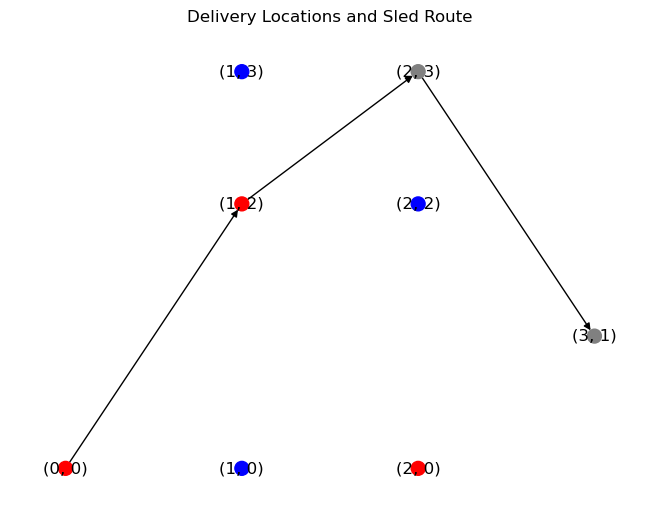

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def plot_route(df, route):
    G = nx.DiGraph()

    # Add nodes for all points in the route with a default color
    for point in route:
        G.add_node(point, color='gray')

    # Add edges for the route
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i+1])

    # Update colors for start and finish locations
    for index, row in df.iterrows():
        G.add_node((row['Start_Horizontal'], row['Start_Vertical']), color='red')
        G.add_node((row['Finish_Horizontal'], row['Finish_Vertical']), color='blue')

    # Position for each node
    pos = {node: (node[0], node[1]) for node in G.nodes()}

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_size=100, node_color=[G.nodes[node]['color'] for node in G.nodes])
    plt.title("Delivery Locations and Sled Route")
    plt.show()

# Example usage
file_path = 'Datasets/1_Geldermalsen.txt'
general_params, df = read_data(file_path)
route = [(0, 0), (1, 2), (2, 3), (3, 1)]  # Example route
plot_route(df, route)


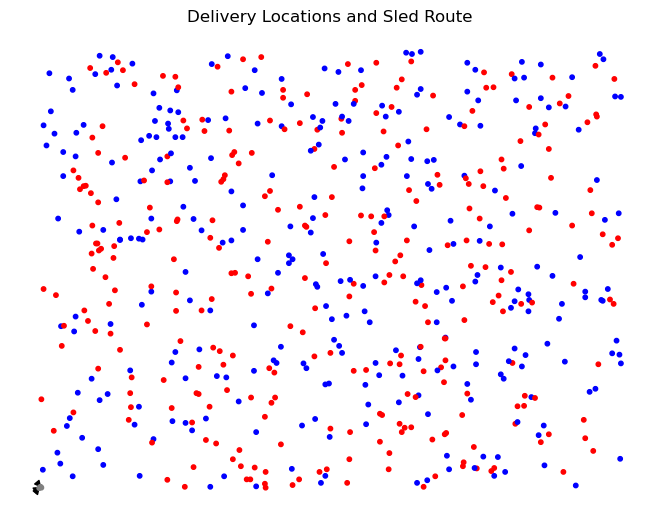

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

def read_data(file_path):
    # Read the general parameters line
    with open(file_path, 'r') as file:
        general_params = list(map(int, file.readline().strip().split()))

    # Read the rest of the file into a DataFrame
    df = pd.read_csv(file_path, sep=' ', skiprows=1, header=None)
    df.columns = ['Start_Horizontal', 'Start_Vertical', 'Finish_Horizontal', 'Finish_Vertical', 'Earliest_Start', 'Latest_Finish']

    return general_params, df

def plot_route(df, route):
    G = nx.DiGraph()

    # Add nodes for all points in the route with a default color
    for point in route:
        G.add_node(point, color='gray')

    # Add edges for the route
    for i in range(len(route) - 1):
        G.add_edge(route[i], route[i+1])

    # Update colors for start and finish locations
    for index, row in df.iterrows():
        G.add_node((row['Start_Horizontal'], row['Start_Vertical']), color='red')
        G.add_node((row['Finish_Horizontal'], row['Finish_Vertical']), color='blue')

    # Position for each node
    pos = {node: (node[0], node[1]) for node in G.nodes()}

    # Draw the graph
    nx.draw(G, pos, with_labels=False, node_size=10, node_color=[G.nodes[node]['color'] for node in G.nodes])
    plt.title("Delivery Locations and Sled Route")
    plt.show()

# Example usage
file_path = 'Datasets/2_Delft.txt'
general_params, df = read_data(file_path)
route = [(0, 0), (1, 2), (2, 3), (3, 1)]  # Example route
plot_route(df, route)


In [16]:
import pandas as pd

def calculate_distance(point1, point2):
    """Calculate the Manhattan distance between two points."""
    return abs(point1[0] - point2[0]) + abs(point1[1] - point2[1])

def nearest_neighbor_route(df):
    # Starting at the first delivery point
    current_point = (df.iloc[0]['Start_Horizontal'], df.iloc[0]['Start_Vertical'])
    unvisited = df.index.tolist()[1:]  # All points except the starting point
    route = [current_point]

    # Iterate until all points are visited
    while unvisited:
        nearest_point, nearest_idx = None, None
        min_distance = float('inf')

        # Find the nearest unvisited point
        for idx in unvisited:
            next_point = (df.loc[idx, 'Start_Horizontal'], df.loc[idx, 'Start_Vertical'])
            distance = calculate_distance(current_point, next_point)
            if distance < min_distance:
                min_distance = distance
                nearest_point = next_point
                nearest_idx = idx

        # Update the current point and mark as visited
        current_point = nearest_point
        route.append(current_point)
        unvisited.remove(nearest_idx)

    return route

# Example usage
# df = pd.DataFrame(...)  # Your DataFrame here
route = nearest_neighbor_route(df)
print("Route:", route)


Route: [(395, 43), (385, 37), (357, 20), (348, 7), (310, 10), (311, 1), (311, 37), (296, 47), (277, 50), (266, 66), (275, 87), (243, 102), (229, 110), (210, 150), (234, 186), (219, 215), (216, 217), (258, 224), (291, 207), (324, 207), (319, 195), (310, 163), (332, 100), (400, 136), (427, 128), (468, 106), (481, 80), (480, 43), (426, 66), (423, 12), (528, 3), (544, 27), (582, 50), (583, 59), (601, 45), (625, 46), (621, 39), (597, 94), (557, 123), (559, 126), (540, 111), (511, 139), (502, 138), (498, 128), (495, 147), (471, 167), (468, 170), (506, 215), (517, 208), (528, 267), (552, 276), (558, 292), (558, 342), (557, 342), (524, 323), (497, 303), (495, 283), (482, 285), (449, 270), (432, 268), (400, 309), (378, 301), (362, 356), (345, 370), (379, 411), (426, 438), (432, 467), (474, 470), (481, 487), (500, 484), (525, 464), (517, 426), (530, 416), (534, 379), (584, 384), (637, 404), (623, 425), (631, 440), (635, 475), (648, 494), (613, 505), (593, 508), (582, 461), (587, 566), (561, 555)

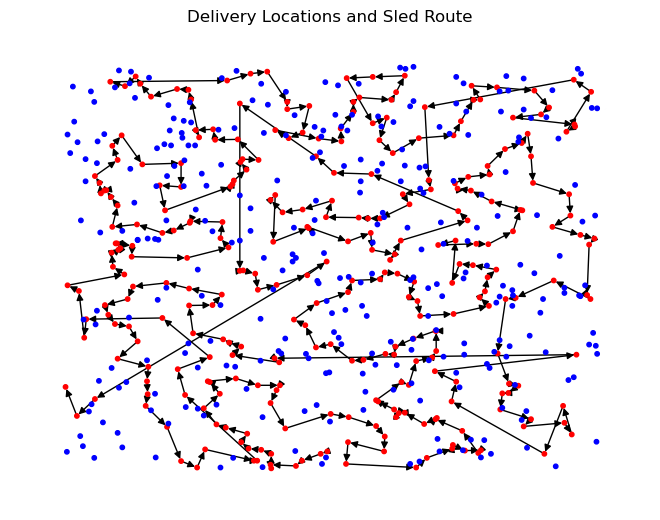

In [17]:
plot_route(df, route)

In [23]:
counter = 0
for route in routes:
    counter+=1
print(counter)

100


In [3]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def read_submission_file(file_path):
    with open(file_path, 'r') as file:
        sled_routes = {}
        for index, line in enumerate(file):
            parts = line.split()
            sled_routes[f'Sled {index + 1}'] = [int(x) for x in parts[1:]] # Assuming delivery numbers are integers
        return sled_routes

def plot_route(sled_number):
    # Placeholder for route plotting logic
    # Here you would retrieve and plot the route of the selected sled
    print(f"Plotting route for {sled_number}")

# GUI Setup
root = tk.Tk()
root.title("Sled Route Viewer")

sled_routes = read_submission_file('santa_submission.txt')
sled_numbers = list(sled_routes.keys())

# Dropdown for selecting a sled
selected_sled = tk.StringVar()
sled_dropdown = ttk.Combobox(root, textvariable=selected_sled, values=sled_numbers)
sled_dropdown.grid(column=0, row=0)

# Button to plot route
plot_button = tk.Button(root, text="Plot Route", command=lambda: plot_route(selected_sled.get()))
plot_button.grid(column=1, row=0)

root.mainloop()


In [2]:
def create_submission_file(sledges_deliveries, file_name):
    with open(file_name, 'w') as file:
        for deliveries in sledges_deliveries:
            # Number of deliveries for this sledge
            M = len(deliveries)
            # Delivery numbers
            delivery_numbers = ' '.join(map(str, deliveries))
            # Write to file
            file.write(f"{M} {delivery_numbers}\n")

# Example usage
sledges_deliveries = [
    [0, 1, 3],    # Deliveries assigned to the first sledge
    [2, 4, 5, 6], # Deliveries assigned to the second sledge
    [7, 8]        # Deliveries assigned to the third sledge
]

create_submission_file(sledges_deliveries, 'santa_submission.txt')